<a href="https://colab.research.google.com/github/pablosilvoni/calculo-area-python/blob/master/IMDB_binary_classification_Chollet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Listing 3.1 Loading the IMDB dataset

In [22]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


The argument num_words=10000 means you’ll only keep the top 10,000 most Frequently occurring words in the training data. Rare words will be discarded. This allows you to work with vector data of manageable size. The variables train_data and test_data are lists

In [23]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [24]:
train_labels[0]

np.int64(1)

The variables train_data and test_data are lists of reviews; each review is a list of word indices (encoding a sequence of words). train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [25]:
max([max(sequence) for sequence in train_data])

9999

In [86]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [87]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [66]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Encoding the integer sequences into a binary matrix


In [26]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Explicación del código por DeepSeek, para saber que hace cada parte del código

In [18]:
# First, get the word mapping
word_index = imdb.get_word_index()
reverse_word_index = dict([(value + 3, key) for (key, value) in word_index.items()])

# Decode the original integer sequence (before vectorization)
decoded_review = ' '.join([reverse_word_index.get(i, '?') for i in train_data[0]])
print("Original Integer Sequence Decoded:")
print(decoded_review)
print("\n")

# Now, let's see the vectorized version and find which words are marked '1'
print("The first 50 elements of the vectorized review (x_train[0][:50]):")
print(x_train[0][:50]) # Just look at the first 50 elements to see some 1s and 0s

# Let's find the indices where the value is 1.0
# This tells us the word IDs that are in the review
indices_of_ones = np.where(x_train[0] == 1.0)[0]
print(f"\nThere are {len(indices_of_ones)} words in this review.")

# Let's translate the first 10 of those indices back to words
print("\nSome of the words in this review (from the vectorized array):")
for word_id in indices_of_ones[:10]:
    # Remember the offset! The word_id in the vector is the key in reverse_word_index
    word = reverse_word_index.get(word_id, '?')
    print(f"Word ID {word_id} -> '{word}'")

Original Integer Sequence Decoded:
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised fo

In [19]:
# Get the shape of the entire x_train dataset
print("Shape of entire x_train:", x_train.shape)  # Output: (25000, 10000)

# Get the shape of the first review vector
print("Shape of x_train[0]:", x_train[0].shape)   # Output: (10000,)

Shape of entire x_train: (25000, 10000)
Shape of x_train[0]: (10000,)


In [20]:
dimension_of_first_review = x_train[0].shape[0]
print("Dimension of x_train[0]:", dimension_of_first_review)
# Output: Dimension of x_train[0]: 10000

Dimension of x_train[0]: 10000


In [21]:
length_of_first_review = len(x_train[0])
print("Length of x_train[0]:", length_of_first_review)
# Output: Length of x_train[0]: 10000

Length of x_train[0]: 10000


In [22]:
size_of_first_review = x_train[0].size
print("Size of x_train[0]:", size_of_first_review)
# Output: Size of x_train[0]: 10000

Size of x_train[0]: 10000


Quick Summary & Recommendation

Method	What it returns	Best for
x_train[0].shape	Returns a tuple: (10000,)	✅ Best overall. Works for arrays of any dimension.

len(x_train[0])	Returns an integer: 10000	✅ Good and simple. Use only for 1D arrays.

x_train[0].size	Returns an integer: 10000	Getting the total number of elements, regardless of shape.

In [27]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Now the data is ready to be fed into a neural network.

Los datos de entrada son vectores y las etiquetas son escalares (unos y ceros): esta es la configuración más sencilla que encontrará. Un tipo de red que funciona bien en este tipo de problema es una pila simple de capas completamente conectadas (densas) con activaciones relu: Dense(16, activación='relu').

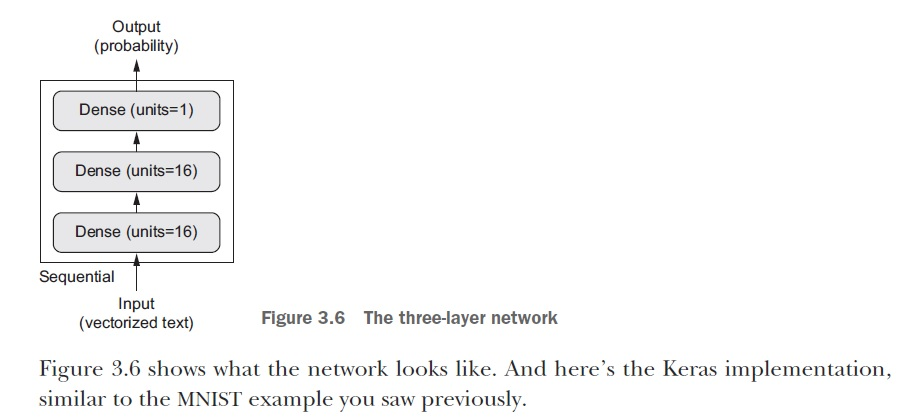

The model definition

In [28]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Elección de la **función de perdida** y el **optimizador**

La entropía cruzada **Crossentropy** suele ser la mejor opción cuando se trabaja con modelos que generan probabilidades

Este es el paso donde se configura el modelo con el *optimizador*
 **rmsprop** y la *función de pérdida* **binary_crossentropy**.


**Compiling the model**

In [29]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

Métrica de monitoreo de la precisión en el entrenamiento : metrics=['accuracy;]

Configuring the optimizer (Si deseo configurar el optimizador) **Este es el que usaremos para el entrenamiento**

In [30]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

Using custom losses and metrics (Función de pérdidas y métricas personalizadas)

In [74]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

Validating your approach - Configuración de datos de validación

Setting aside a validation set

In [31]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model** (Entrenamiento o aprendizaje)

Ahora entrenaremos el modelo durante 20 épocas (20 iteraciones sobre todas las muestras en los tensores x_train e y_train), en minilotes de 512 muestras. Simultáneamente, monitorearemos la pérdida y la precisión en las 10 000 muestras que separamos. Para ello, pasaremos los datos de validación como el argumento "validation_data".

In [32]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - acc: 0.7063 - loss: 0.5983 - val_acc: 0.8631 - val_loss: 0.4168
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 0.8914 - loss: 0.3607 - val_acc: 0.8702 - val_loss: 0.3445
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.9156 - loss: 0.2688 - val_acc: 0.8855 - val_loss: 0.2976
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.9329 - loss: 0.2137 - val_acc: 0.8838 - val_loss: 0.2888
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.9472 - loss: 0.1731 - val_acc: 0.8826 - val_loss: 0.2894
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - acc: 0.9501 - loss: 0.1553 - val_acc: 0.8881 - val_loss: 0.2796
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - acc: 0.9612 - loss: 0.1324 - val_acc: 0.8856 - val_loss: 0.2893
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.9680 - loss: 0.1109 - val_acc: 0.8864 - val_loss: 0.2949
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.9735

**History Object** (objeto history)

Tener en cuenta que la llamada a model.fit() devuelve un objeto History. Este objeto tiene un miembro llamado history, que es un diccionario que contiene datos sobre todo lo ocurrido durante el entrenamiento. Veamos esto:

El diccionario contiene cuatro entradas: una por cada métrica monitoreada durante el entrenamiento y la validación.

In [38]:
history_dict = history.history
history_dict.keys()




dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

**Plotting the training and validation loss**

Ahora usaremos Matplotlib para representar gráficamente la pérdida de entrenamiento y validación, así como la precisión de entrenamiento y validación:

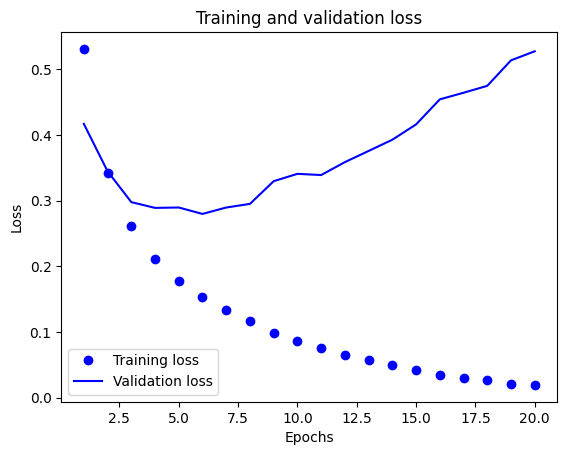

In [39]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
# acc = history_dict['acc'] # Extract accuracy
# val_acc = history_dict['val_acc'] # Extract validation accuracy

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Plotting the training and validation accuracy**

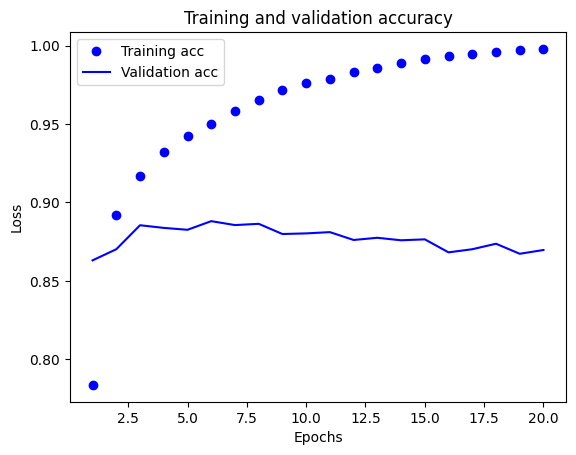

In [40]:
plt.clf() # Clears the figure

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Interpretación de los resultados del entrenamiento**

***Overfitting (sobreentrenamiento o sobreajuste)***

Como se puede ver, la pérdida de entrenamiento disminuye con cada época, y la precisión del entrenamiento aumenta con cada época. Esto es lo que se esperaría al ejecutar la optimización de gradiente descendente: la cantidad que se intenta minimizar debería ser menor con cada iteración. Sin embargo, este no es el caso de la pérdida de validación y la precisión: parecen alcanzar su punto máximo en la cuarta época.

Este es un ejemplo de lo que advertimos anteriormente: un modelo que funciona mejor con los datos de entrenamiento no es necesariamente un modelo que funcionará mejor con datos que nunca antes ha visto.

En términos precisos, lo que se observa es sobreajuste: después de la segunda época, se está sobreoptimizando con los datos de entrenamiento y se terminan aprendiendo representaciones específicas de los datos de entrenamiento que no se generalizan a datos fuera del conjunto de entrenamiento.

En este caso, para evitar el sobreajuste, se podría detener el entrenamiento después de tres épocas. En general, se pueden utilizar diversas técnicas para mitigar el sobreajuste, que abordaremos en el capítulo 4.

**Reentrenamiento** (Retraining a model from scratch)

Entrenemos una nueva red desde cero durante cuatro épocas y luego la evaluemos con los datos de prueba.

In [42]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7321 - loss: 0.5565
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9017 - loss: 0.2827
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9254 - loss: 0.2159
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9342 - loss: 0.1845
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8846 - loss: 0.2856


In [43]:
results


[0.28419116139411926, 0.8873599767684937]

Este enfoque, bastante ingenuo, alcanza una precisión del 88 %. Con métodos de vanguardia, se debería poder alcanzar cerca del 95 %.

**Uso de una red entrenada para generar predicciones sobre nuevos datos**

Tras entrenar una red, querrás usarla en un entorno práctico. Puedes calcular la probabilidad de que las reseñas sean positivas mediante el método de predicción:

In [49]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.22055064],
       [0.999923  ],
       [0.883368  ],
       ...,
       [0.09840676],
       [0.08079841],
       [0.58194214]], dtype=float32)

In [50]:
predictions = model.predict(x_test)
print(predictions.shape)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
(25000, 1)


Como se puede ver, la red es confiable para algunas muestras (0,99 o más, o 0,01 o menos), pero menos confiable para otras (0,6, 0,4).

**Experimentos adicionales**

Los siguientes experimentos le ayudarán a convencerse de que las decisiones de arquitectura que ha tomado son bastante razonables, aunque aún hay margen de mejora:

1. Ha utilizado dos capas ocultas. Pruebe a usar una o tres capas ocultas y
  observe cómo esto afecta la validación y la precisión de las pruebas.

2. Pruebe a usar capas con más o menos unidades ocultas: 32 unidades, 64
   unidades, etc.

3. Pruebe a usar la función de pérdida mse en lugar de binary_crossentropy.

4. Pruebe a usar la activación tanh (una activación popular en los inicios
   de las redes neuronales) en lugar de relu.


**Conclusiones**

***Esto es lo que debes sacar de este ejemplo:***


Normalmente, se requiere un preprocesamiento considerable de los datos sin procesar para poder alimentarlos (como tensores) a una red neuronal. Las secuencias de palabras se pueden codificar como vectores binarios, pero también existen otras opciones de codificación.

Las pilas de capas densas con activaciones relu pueden resolver una amplia gama de problemas (incluida la clasificación de sentimientos), y probablemente se utilicen con frecuencia.

En un problema de clasificación binaria (dos clases de salida), la red debe terminar con una capa densa con una unidad y una activación sigmoidea: la salida de la red debe ser un escalar entre 0 y 1, que codifica una probabilidad.

Con una salida escalar sigmoidea de este tipo en un problema de clasificación binaria, la función de pérdida que se debe utilizar es binary_crossentropy.

El optimizador rmsprop suele ser una buena opción, sea cual sea el problema. Es una preocupación menos.

A medida que mejoran sus datos de entrenamiento, las redes neuronales comienzan a sobreajustarse y obtienen resultados cada vez peores con datos nunca antes vistos. Asegúrese de supervisar siempre el rendimiento con datos fuera del conjunto de entrenamiento.